# Analyzing Product Sentiment

In [1]:
import zipfile as zf

In [3]:
files = zf.ZipFile(r'Amazon_baby.sframe.zip','r')
files.extractall()
files.close()

In [2]:
import turicreate as tc

In [3]:
products = tc.SFrame('amazon_baby.sframe')

In [4]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


## Counting Words in a Sentence

In [4]:
products['word_count'] = tc.text_analytics.count_words(products['review'])

In [6]:
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [7]:
tc.visualization.set_target()
products['name'].show()

Materializing SArray

## Explore Vullie Sophie

In [5]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [6]:
len(giraffe_reviews)

785

In [10]:
giraffe_reviews['rating'].show()

Materializing SArray

## Build a Sentiment Classifier

In [11]:
products['rating'].show()

Materializing SArray

## Define what's Positive and Negative Sentiment

In [7]:
# Ignoring 3-star rating
products = products[products['rating']!=3]

In [8]:
# Positive Sentiment = 4-star and 5-star reviews
products['sentiment'] = products['rating']>=4

In [16]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


## Let's Train Sentiment Classifier

In [9]:
train_data, test_data = products.random_split(0.8, seed = 0)

In [10]:
sentiment_model = tc.logistic_classifier.create(train_data,
                                        target = 'sentiment',
                                        features = ['word_count'],
                                        validation_set = test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 2.273449     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 4.054592     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 4.759757     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 5.307062     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 6.181205     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 9.115106     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [48]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9342357833151299,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.3304787187232089,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

## Evaluate the Sentiment Model

In [11]:
roc_data = sentiment_model.evaluate(test_data, metric = 'roc_curve')

In [40]:
tc.show(roc_data['roc_curve']['fpr'], roc_data['roc_curve']['tpr'])

Materializing X axis SArray

Materializing Y axis SArray

In [12]:
import matplotlib.pyplot as plt

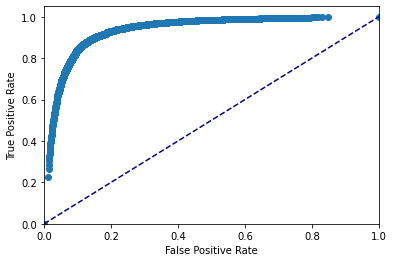

In [13]:
plt.scatter(roc_data['roc_curve']['fpr'], roc_data['roc_curve']['tpr'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Applying the model to understand the sentiment about the giraffe

In [14]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type = 'probability')

In [15]:
giraffe_reviews.tail()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,The rubber is perfect fora teething baby. It also ...,5.0,"{'entertainment': 1.0,'to': 1.0, 'sound': 1.0, ...",0.9920207213192529
Vulli Sophie the GiraffeTeether ...,The Sophie Giraffe has avery strong rubber odor ...,1.0,"{'clean': 1.0, 'is': 1.0,'hair': 1.0, 'or': 1.0, ...",0.17527741531036678
Vulli Sophie the GiraffeTeether ...,It is worth the price. Mydaughter loves it!!! We ...,5.0,"{'but': 1.0, 'products':1.0, 'to': 1.0, 'soph ...",0.9987787012304867
Vulli Sophie the GiraffeTeether ...,I was very optimistic atfirst on purchasing ...,5.0,"{'old': 1.0, 'they': 1.0,'wish': 1.0, 'hands': ...",0.9999917914880243
Vulli Sophie the GiraffeTeether ...,Even though the productis sold guaranteeing ...,1.0,"{'refund': 1.0, 'or':1.0, 'replacement': 1.0, ...",0.03382946809139056
Vulli Sophie the GiraffeTeether ...,My baby loves her SophieChew Toy. She can che ...,5.0,"{'little': 1.0, 'one':1.0, 'for': 1.0, 'she': ...",0.9993865345665016
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe was abig hit at the baby ...,5.0,"{'gift': 1.0, 'shower':1.0, 'my': 1.0, 'at': ...",0.9623500030079157
Vulli Sophie the GiraffeTeether ...,quick shipping andperfect product. I would ...,5.0,"{'loves': 1.0, 'she':1.0, 'purchase': 1.0, ...",0.9999472307149151
Vulli Sophie the GiraffeTeether ...,My baby who is currentlyteething love his Sop ...,5.0,"{'job': 1.0, 'toy': 1.0,'but': 1.0, 'chew': 1.0, ...",0.9995310932177033
Vulli Sophie the GiraffeTeether ...,"I know several baits thatare enjoying the soft, ...",5.0,"{'to': 1.0, 'it': 1.0,'baby': 1.0, 'she': 1.0, ...",0.9999352494013865


## Sort the reviews based on the predicted sentiment and explore

In [16]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending = False)

In [17]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'around': 1.0,'explore': 1.0, 'they': ...",1.0
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'will': 1.0, '15months':1.0, 'would': 2.0, ...",1.0
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, 'who': ...",1.0
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'out': 1.0, 'would':1.0, 've': 1.0, 'enou ...",0.9999999999998377
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'whether': 1.0,'neutral': 1.0, 'gend ...",0.9999999999998284
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'little':1.0, 'perfect': 1.0, ...",0.9999999999997958
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'worth': 1.0, 'works':1.0, 'teether': 1.0, ...",0.9999999999994914
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'question': 1.0, 'must':1.0, 'overall': 1.0, ...",0.9999999999941254
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'makers': 1.0, 'or':1.0, 'take': 1.0, 'can': ...",0.999999999987423
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",0.9999999999829475


## Show most positive reviews

In [51]:
giraffe_reviews[0]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

In [53]:
giraffe_reviews[1]['review']

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

## Show most negative reviews

In [54]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [59]:
giraffe_reviews[-35]['review']

"This giraffe is very cute, and I'm sure my daughter would have loved it. But as soon as I received the item (purchased from Dainty Baby) I followed the directions to wash the item with soapy water and a washcloth, and the paint started rubbing off (and I've since read about the same thing happening in other reviews). Whether it's safe (food dye?) paint or not, I'm not comfortable my baby ingesting anything from a toy."

## Assessment

### List of some selected words

In [1]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

### Creating a column and finding occurance of particular word in that row

In [21]:
for word in selected_words:
    products[word] = products['word_count'].apply(lambda occur: occur.get(word,0))

### Spliting the data

In [26]:
train_data2, test_data2 = products.random_split(0.8, seed = 0)

### Creating a model

In [28]:
selected_words_model = tc.logistic_classifier.create(train_data2,
                                                target = 'sentiment',
                                                features = selected_words,
                                                validation_set = test_data2)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.219061     | 0.847401          | 0.845874            |

| 2         | 3        | 0.363581     | 0.847514          | 0.846085            |

| 3         | 4        | 0.498569     | 0.847626          | 0.846115            |

| 4         | 5        | 0.636406     | 0.847708          | 0.846385            |

| 5         | 6        | 0.769786     | 0.847708          | 0.846385            |

| 6         | 7        | 0.902175     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

### Coefficients of the features

In [30]:
selected_words_model.coefficients

name,index,class,value,stderr
(intercept),None,1,1.3365913848877726,0.008929969787655916
awesome,None,1,1.133534666034134,0.08399643983187562
great,None,1,0.8630655001196439,0.018955052444376685
fantastic,None,1,0.88580475688142,0.11167591293399651
amazing,None,1,1.100093311366018,0.0995477626046598
love,None,1,1.359268866922504,0.02806830015209953
horrible,None,1,-2.251335236759102,0.08020249388788425
bad,None,1,-0.9914778800650664,0.03848428664699063
terrible,None,1,-2.2236614360851346,0.07731736203785744
awful,None,1,-2.0529082040313598,0.10099735435259247


### Sorting the values

In [36]:
selected_words_model.coefficients.sort('value', ascending = False)

name,index,class,value,stderr
love,None,1,1.359268866922504,0.02806830015209953
(intercept),None,1,1.3365913848877726,0.008929969787655916
awesome,None,1,1.133534666034134,0.08399643983187562
amazing,None,1,1.100093311366018,0.0995477626046598
fantastic,None,1,0.88580475688142,0.11167591293399651
great,None,1,0.8630655001196439,0.018955052444376685
wow,None,1,-0.00953823606768843,0.16046411224711649
bad,None,1,-0.9914778800650664,0.03848428664699063
hate,None,1,-1.3484407222463202,0.07715698604297323
awful,None,1,-2.0529082040313598,0.10099735435259247


### Evaluating the accuracy of the model

In [80]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9342357833151299,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.3304787187232089,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

In [47]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8400192169108815,
 'auc': 0.5,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  5328 |
 |      1       |        1        | 27976 |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 0.9130548302872062,
 'log_loss': 0.44490955972938606,
 'precision': 0.8400192169108815,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 27976 | 5328 |
 |   1e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   2e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   3e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   4e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   

### Investigate a product named ‘Baby Trend Diaper Champ’

In [39]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [40]:
len(diaper_champ_reviews)

298

### Predicting Sentiment for ‘Baby Trend Diaper Champ’ from sentiment_model

In [41]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews,
                                                                     output_type= 'probability')

In [42]:
diaper_champ_reviews.head()

name,review,rating,word_count,sentiment,awesome
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'more': 1.0, 'trash': ...",1,0.0
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'system': 1.0, 'try':1.0, 're': 1.0, 'still': ...",0,0.0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",1,0.0
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",1,0.0
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'outside': 1.0, 'day': ...",1,0.0
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'my': 1.0,'empty': 2.0, 'poop': ...",1,0.0
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'yuck': 1.0, 'clean':1.0, 'all': 1.0, 'tra ...",0,0.0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'handle': 1.0, ' ...",1,0.0
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'no': 1.0, 'regular':1.0, 'part': 1.0, ...",1,0.0


### Sorting based on the predicted sentiment value

In [43]:
diaper_champ_reviews.sort('predicted_sentiment', ascending = False)

name,review,rating,word_count,sentiment,awesome
Baby Trend Diaper Champ,I read a review belowthat can explain exactly ...,4.0,"{'key': 1.0, 'have': 1.0,'pieces': 1.0, 'betwe ...",1,0.0
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'priceless': 1.0,'knows': 1.0, 'parent': ...",1,0.0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1,0.0
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,"{'around': 1.0, 'any':1.0, 't': 1.0, 'isn': ...",1,0.0
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'either': 1.0, 'be':1.0, 't': 1.0, 'not': ...",1,0.0
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'hope': 1.0, 'make':1.0, 'slower': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'product':1.0, 'recommend': 1.0, ...",1,0.0
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'ll': 1.0, 'baby': 1.0,'recommended': 1.0, ' ...",1,0.0
Baby Trend Diaper Champ,I see that there arecomplaints of stinkiness ...,5.0,"{'very': 1.0, 'told':1.0, 'all': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I have a 10 year olddaughter and an 8 month ...,5.0,"{'sorry': 1.0, 'be': 1.0,'you': 2.0, 'sell': 1.0, ...",1,0.0


### Predicting Sentiment for ‘Baby Trend Diaper Champ’ from selected_words_model

In [84]:
diaper_champ_reviews['predicted_sentiment_selected_words'] = selected_words_model.predict(diaper_champ_reviews,
                                                                     output_type= 'probability')

In [85]:
diaper_champ_reviews.sort('predicted_sentiment_selected_words', ascending = False)

name,review,rating,word_count,sentiment,awesome
Baby Trend Diaper Champ,I LOVE LOVE LOVE thisproduct! It is SO much ...,4.0,"{'sorry': 1.0, 'be': 1.0,'will': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I received my DiaperChamp at my baby shower ...,5.0,"{'second': 2.0, 'have':1.0, 'are': 1.0, 'pull': ...",1,0.0
Baby Trend Diaper Champ,"Love it, love it, loveit! This lives up to ...",5.0,"{'parents': 1.0, 'new':1.0, 'recommended': 1.0, ...",1,0.0
Baby Trend Diaper Champ,"Let me just say, I LOVETHIS PRODUCT!! I used ...",5.0,"{'friends': 1.0, 'feces':1.0, 'tank': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I have been using thisdiaper pail for 41/2 ...,5.0,"{'recommend': 1.0,'would': 1.0, 'with': ...",1,0.0
Baby Trend Diaper Champ,Works great - no smells.LOVE that it uses reg ...,5.0,"{'plastic': 1.0, 'in':1.0, 'each': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I love this diaper paleand wouldn't dream of ...,5.0,"{'easy': 1.0, 'how': 1.0,'like': 1.0, 'on': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I love this diaper pail.It keeps the diapers ...,4.0,"{'wish': 1.0, 'is': 1.0,'stars': 1.0, 'gave': ...",1,0.0
Baby Trend Diaper Champ,I have a two-year-old sonand I love the Diaper ...,5.0,"{'close': 1.0, 'sticky':1.0, 'tightly': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I love this diaper pail!It's so easy to use a ...,5.0,"{'some': 1.0, 'save':1.0, 'refills': 1.0, ...",1,0.0


### Majority Class Classifier in the test_data

In [54]:
test_data.head()

name,review,rating,word_count,sentiment
Nature's Lullabies FirstYear Sticker Calendar ...,"Space for monthly photos,info and a lot of useful ...",5.0,"{'i': 1.0, 'it': 2.0,'come': 1.0, 'stickers': ...",1
Nature's Lullabies SecondYear Sticker Calendar ...,This was the onlycalender I could find ...,5.0,"{'him': 1.0, 'got': 1.0,'than': 1.0, 'turn': ...",1
"Lamaze Peekaboo, I LoveYou ...",I like how the book has ahook to attach it to ...,5.0,"{'family': 1.0, 'over':1.0, 'to': 3.0, 'hook': ...",1
"Lamaze Peekaboo, I LoveYou ...",What a great book forbabies! I'd been loo ...,5.0,"{'baby': 1.0, '10': 1.0,'which': 1.0, 'damaged': ...",1
SoftPlay Twinkle TwinkleElmo A Bedtime Book ...,,5.0,{},1
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,We wanted to get anotherbook like the Big Birds ...,4.0,"{'creative': 1.0, 'has':1.0, 'bird': 1.0, 'mo ...",1
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,My 3 month old son lovesthis book. We read it ...,5.0,"{'sure': 1.0, 'so': 1.0,'baby': 1.0, 'fun': 1.0, ...",1
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,"{'color': 1.0, 'pink':1.0, 'pastel': 1.0, ...",1
God Created EverythingNite Lite ...,"This is well made a verypretty,. It gives a ...",5.0,"{'gift': 1.0, 'great':1.0, 'nice': 1.0, 'and': ...",1
Cloth Diaper PinsStainless Steel ...,A great safety pin thathas lots of uses. Easy ...,5.0,"{'dozen': 1.0, 'and':1.0, 'bright': 1.0, ...",1


In [71]:
tot = test_data.num_rows()
tot

33304

In [68]:
test_data[test_data['rating']== 2].num_rows()

2248

In [73]:
for i in range(1,6):
    num = test_data[test_data['rating'] == i].num_rows()
    print ("Sum of rating ", i, " is ", num)

Sum of rating  1  is  3080
Sum of rating  2  is  2248
Sum of rating  3  is  0
Sum of rating  4  is  6632
Sum of rating  5  is  21344


In [74]:
(6632+21344)/tot

0.8400192169108815

In [ ]:
for word in selected_words:
    products[word] = products['word_count'].apply(lambda occur: occur.get(word,0))

In [ ]:
for word in selected_words:
    a = 

In [88]:
diaper_champ_reviews['awesome'].add_columnsum(0)

AttributeError: 'SArray' object has no attribute 'add_columnsum'